In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

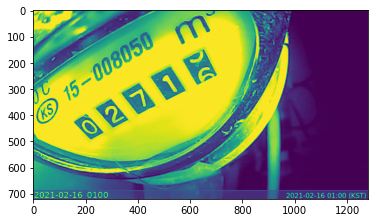

In [8]:
file = 'C:/Temp/Pictures/2021-02-16_0100.jpg'
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

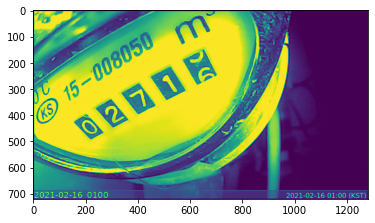

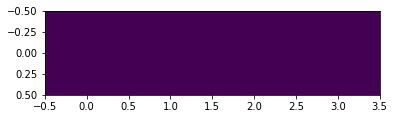

In [10]:
def is_overlapping_horizontally(box1, box2):
    x1, _, w1, _ = box1
    x2, _, _, _ = box2
    if x1 > x2:
        return is_overlapping_horizontally(box2, box1)
    return (x2 - x1) < w1

def merge(box1, box2):
    assert is_overlapping_horizontally(box1, box2)
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    x = min(x1, x2)
    w = max(x1 + w1, x2 + w2) - x
    y = min(y1, y2)
    h = max(y1 + h1, y2 + h2) - y
    return (x, y, w, h)

def windows(contours):
    """return List[Tuple[x: Int, y: Int, w: Int, h: Int]]"""
    boxes = []
    for cont in contours:
        box = cv2.boundingRect(cont)
        if not boxes:
            boxes.append(box)
        else:
            if is_overlapping_horizontally(boxes[-1], box):
                last_box = boxes.pop()
                merged_box = merge(box, last_box)
                boxes.append(merged_box)
            else:
                boxes.append(box)
    return boxes

contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_dict = dict()
for cont in contours:
    x, y, w, h = cv2.boundingRect(cont)
    area = cv2.contourArea(cont)
    if 10 < area and 10 < w and h > 5:
        contours_dict[(x, y, w, h)] = cont
contours_filtered = sorted(contours_dict.values(), key=cv2.boundingRect)
boxes = windows(contours_filtered)
for b in boxes:
    x, y, w, h = b
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(img)
    plt.show()
    plt.imshow(roi)
    plt.show()